https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

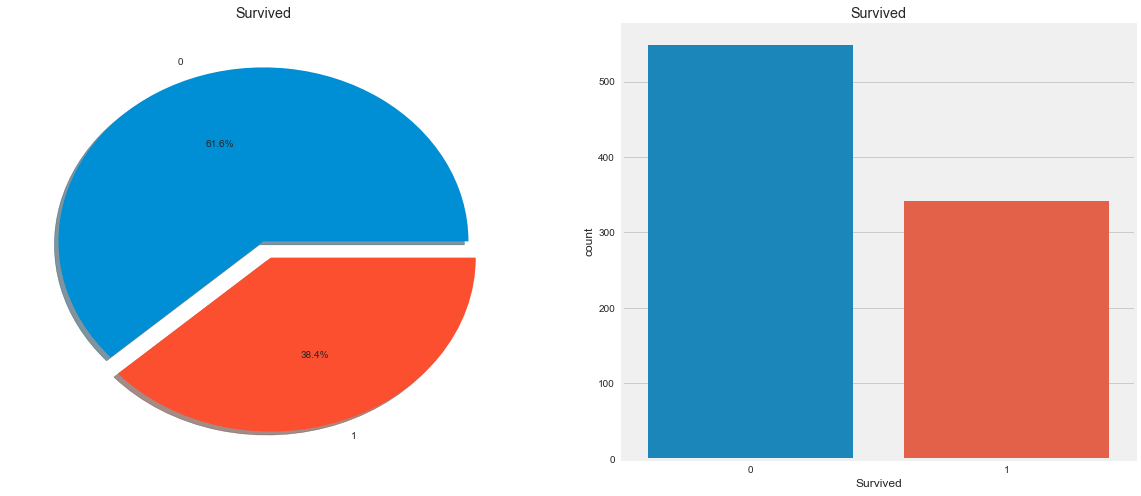

In [4]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [6]:
data.groupby(['Sex', 'Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [7]:
data.groupby(['Sex', 'Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

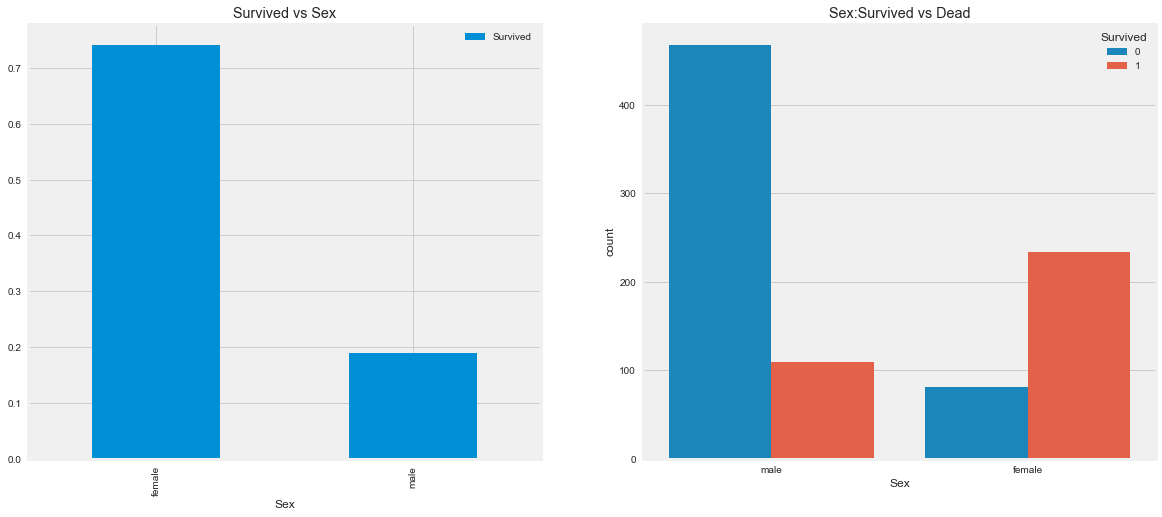

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

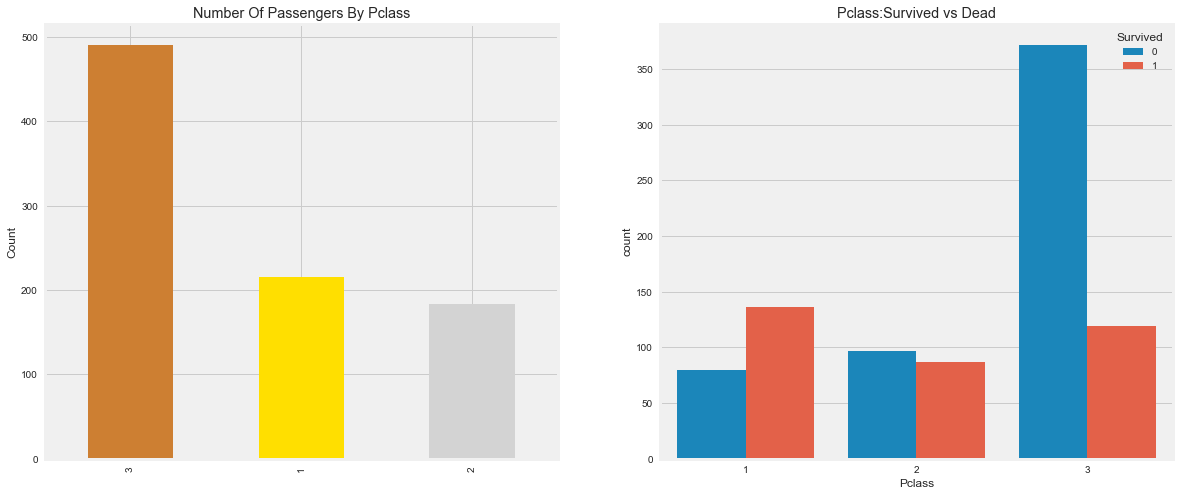

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

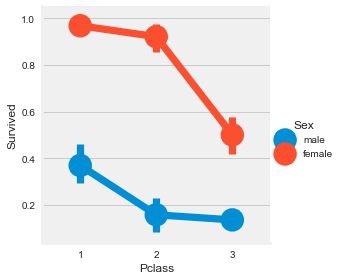

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [13]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

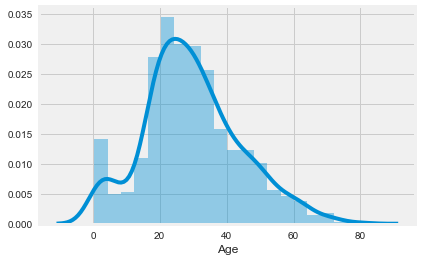

In [14]:
sns.distplot(data.Age[data.Age.notnull()])
plt.show()

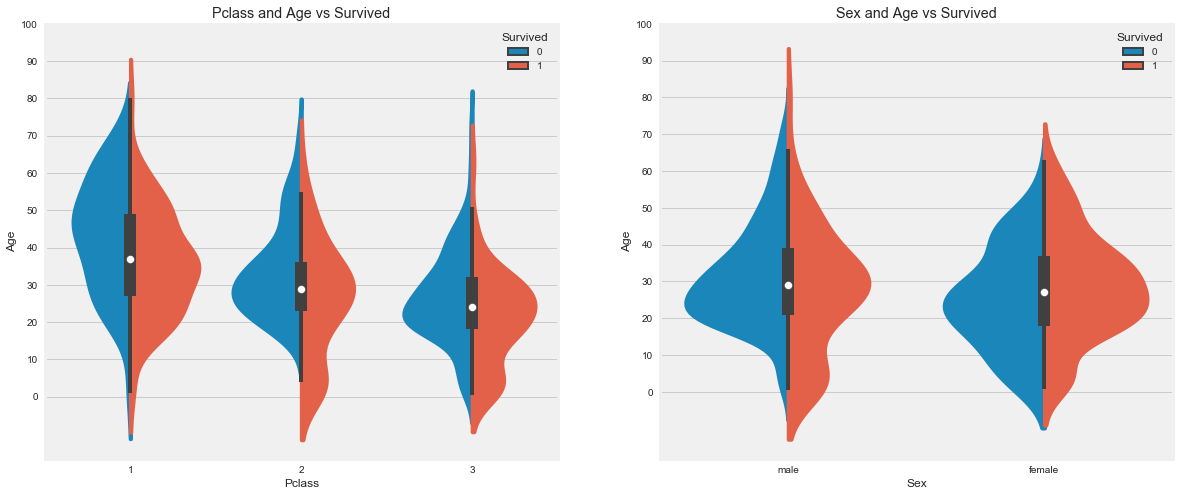

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

In [16]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [17]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [19]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
data.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [21]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [22]:
data.Age.isnull().any()

False

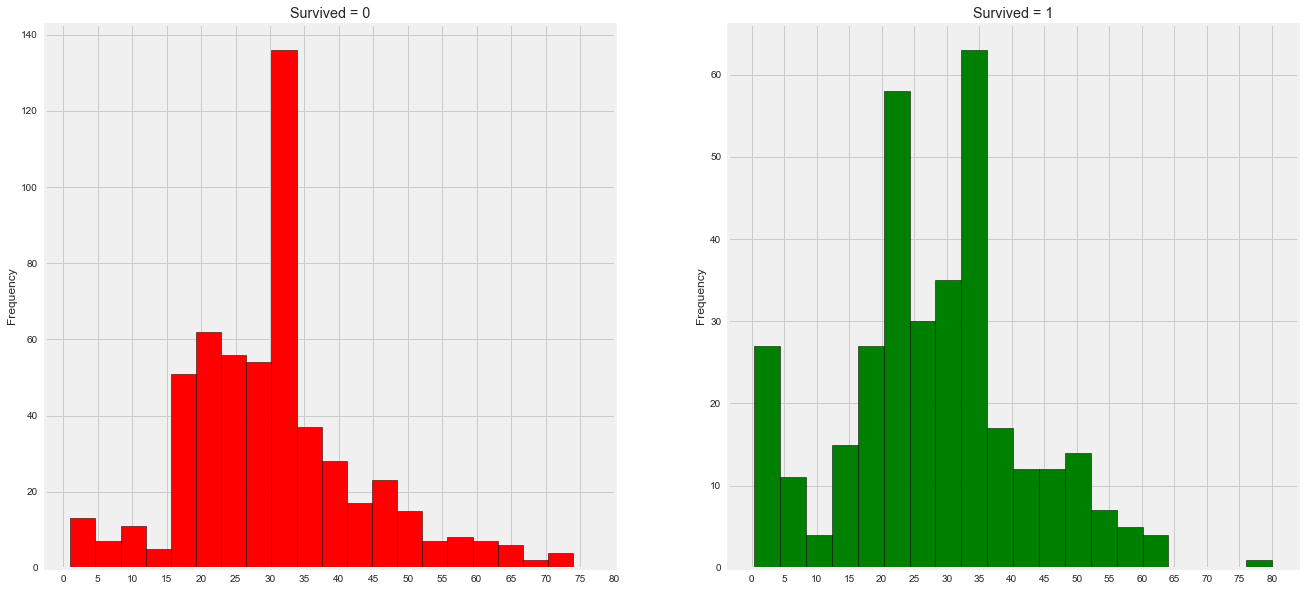

In [23]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

data[data.Survived == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data.Survived == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

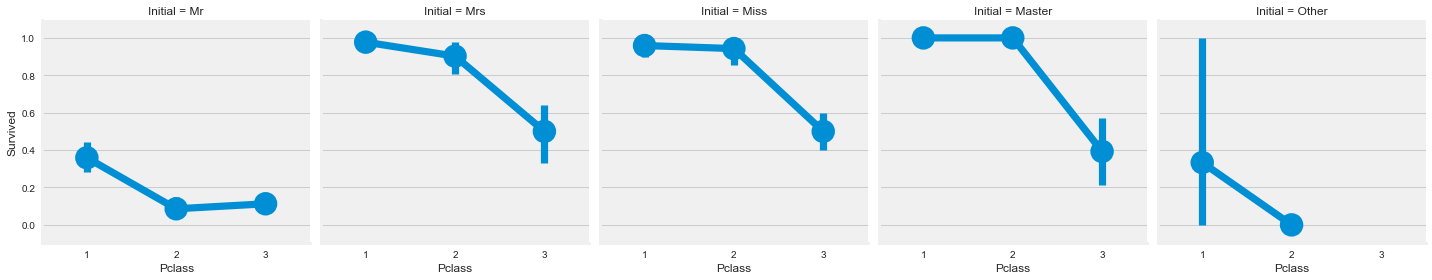

In [24]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [25]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

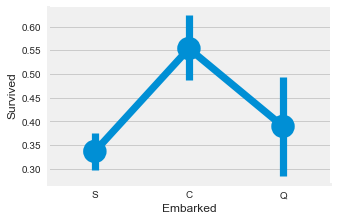

In [26]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

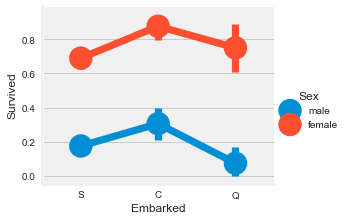

In [27]:
sns.factorplot('Embarked', 'Survived', hue='Sex', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

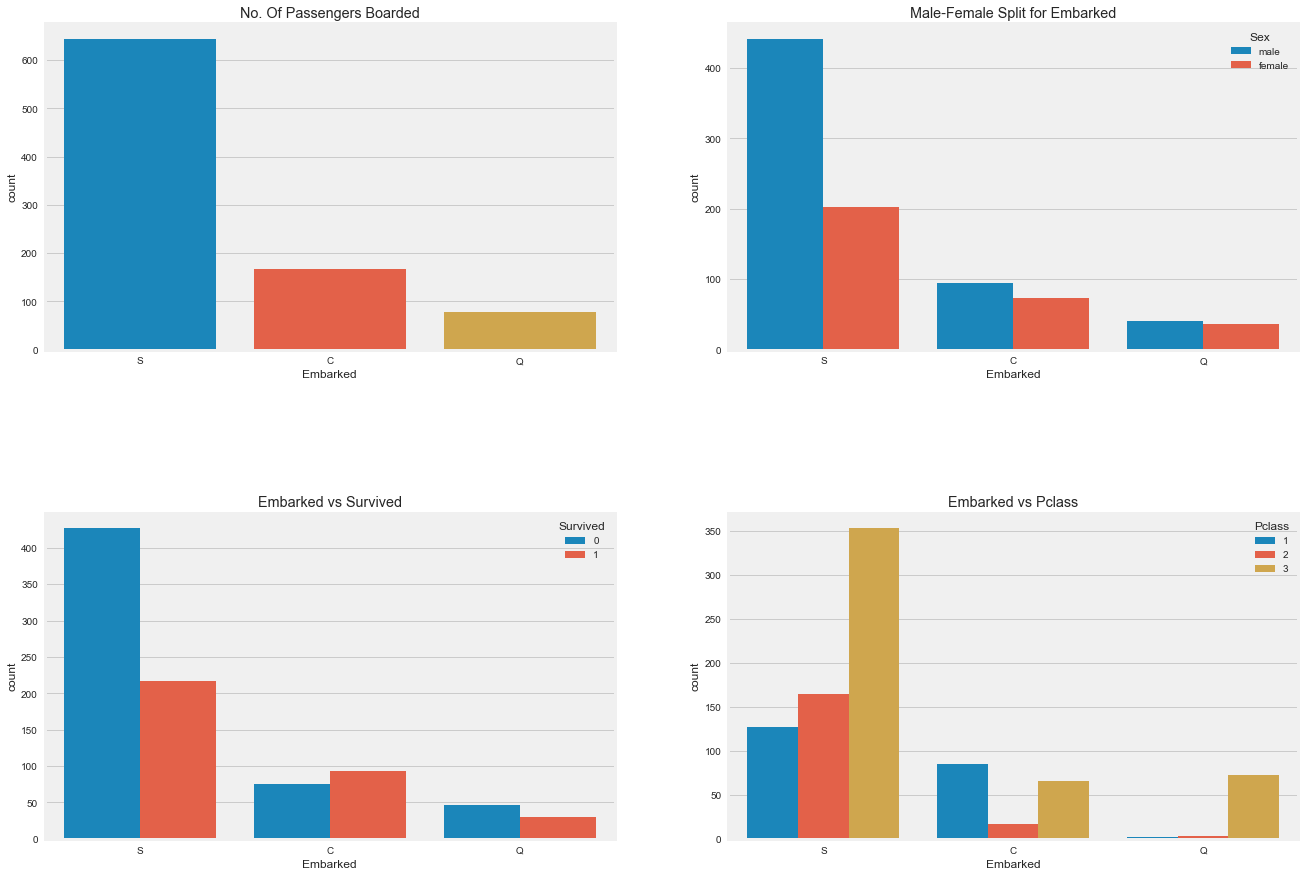

In [28]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

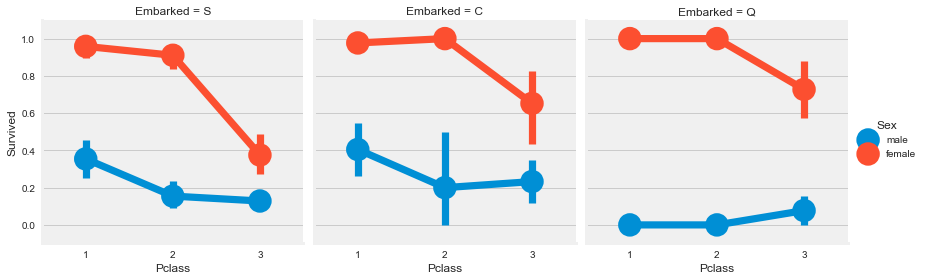

In [29]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

In [30]:
data['Embarked'].fillna('S', inplace=True)

In [31]:
data.Embarked.isnull().any()

False

In [32]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

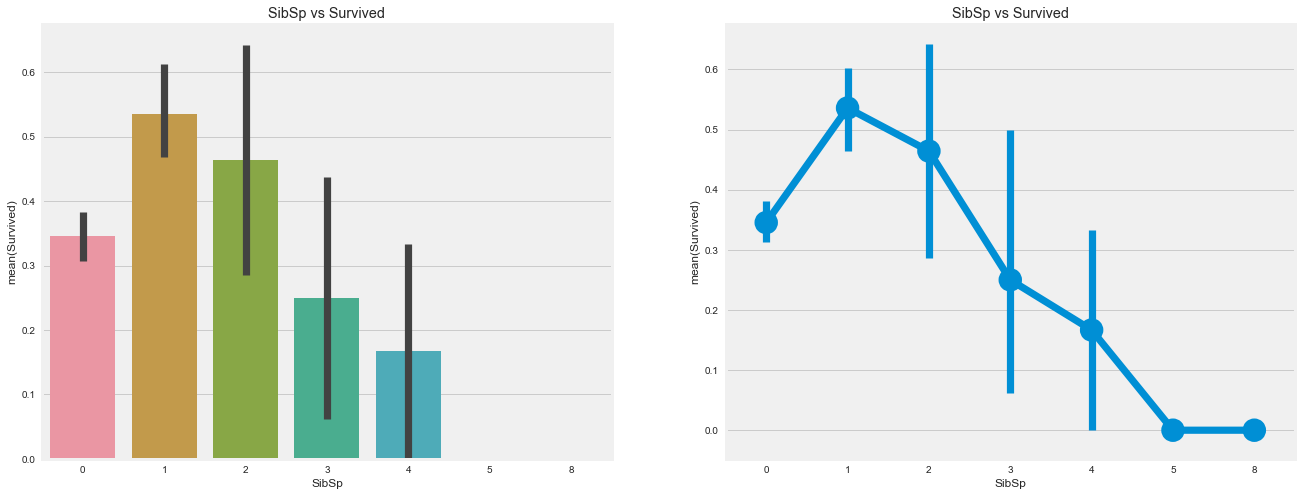

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [34]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

In [35]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

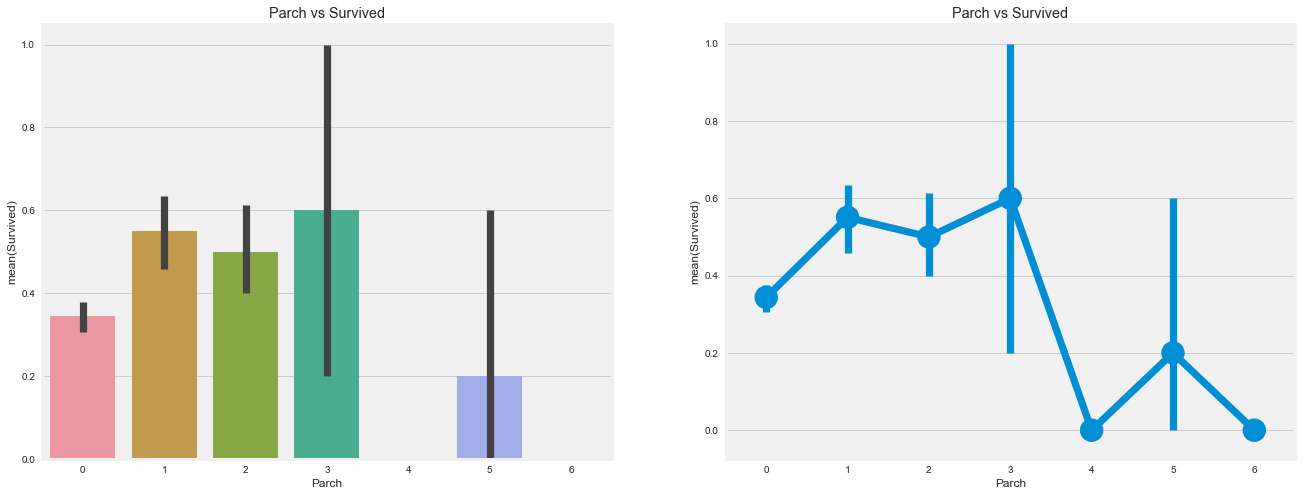

In [36]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

In [37]:
pd.crosstab(data.Parch + data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

In [38]:
pd.crosstab(data.Parch + data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

In [39]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

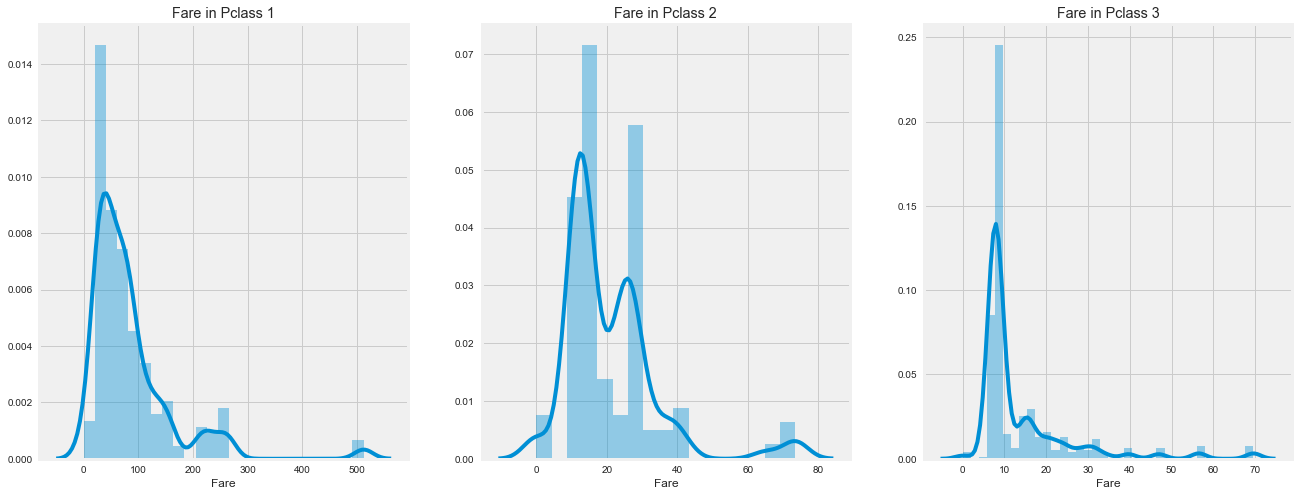

In [40]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
for i in range(3):
    sns.distplot(data[data.Pclass == i + 1].Fare, ax=ax[i])
    ax[i].set_title('Fare in Pclass %d' % (i + 1))
plt.show()

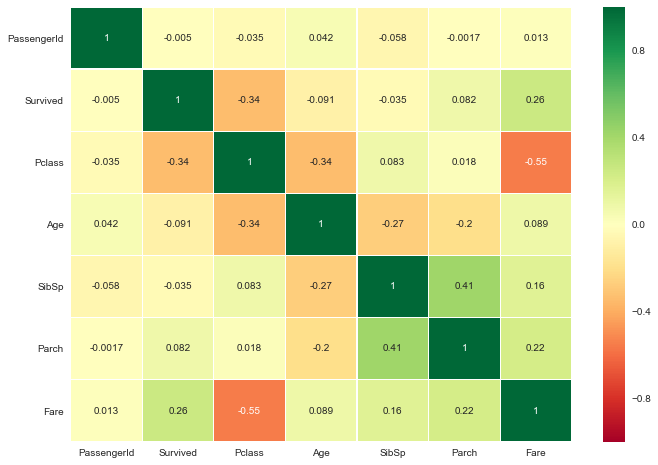

In [41]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [42]:
data['Age_band'] = pd.cut(data.Age, 5, labels=list(range(5)))
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [43]:
data.Age_band.value_counts().to_frame().style.background_gradient(cmap='summer')

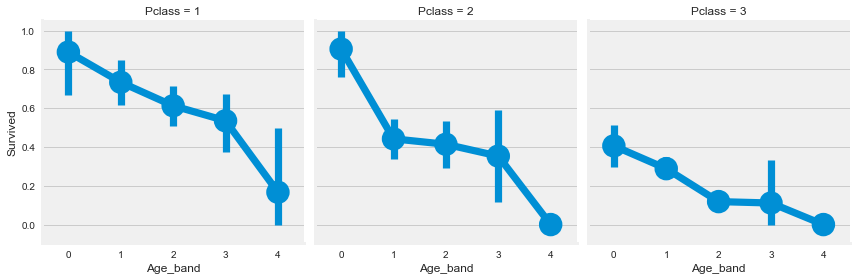

In [44]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

In [45]:
data['Family_Size'] = data.Parch + data.SibSp
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

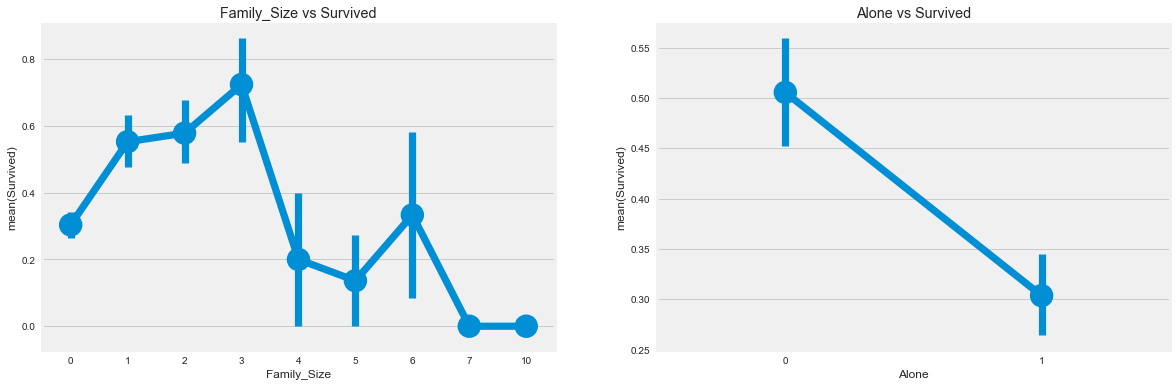

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

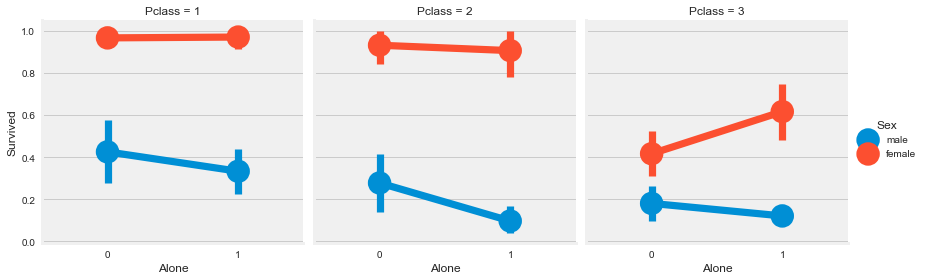

In [47]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

In [48]:
data['Fare_Range'] = pd.qcut(data.Fare, 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

In [49]:
data['Fare_cat'] = pd.qcut(data.Fare, 4, labels=list(range(4)))
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"[0, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31, 512.329]",3


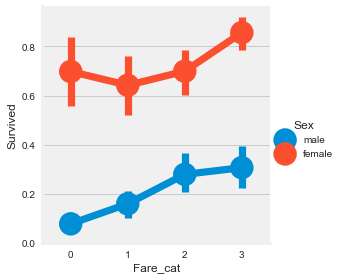

In [50]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [51]:
data.Sex.replace(['male', 'female'], [0, 1], inplace=True)
data.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data.Initial.replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace=True)

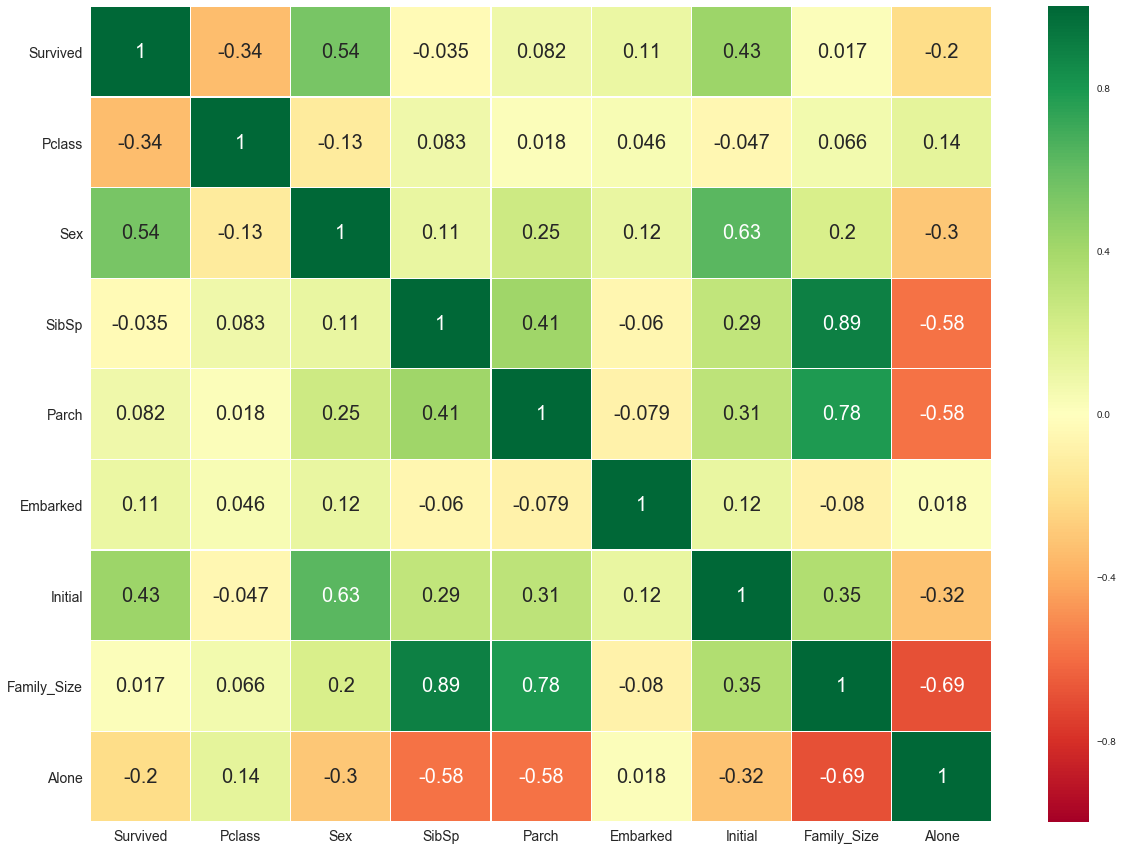

In [52]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
plt.gcf().set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [53]:
data.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


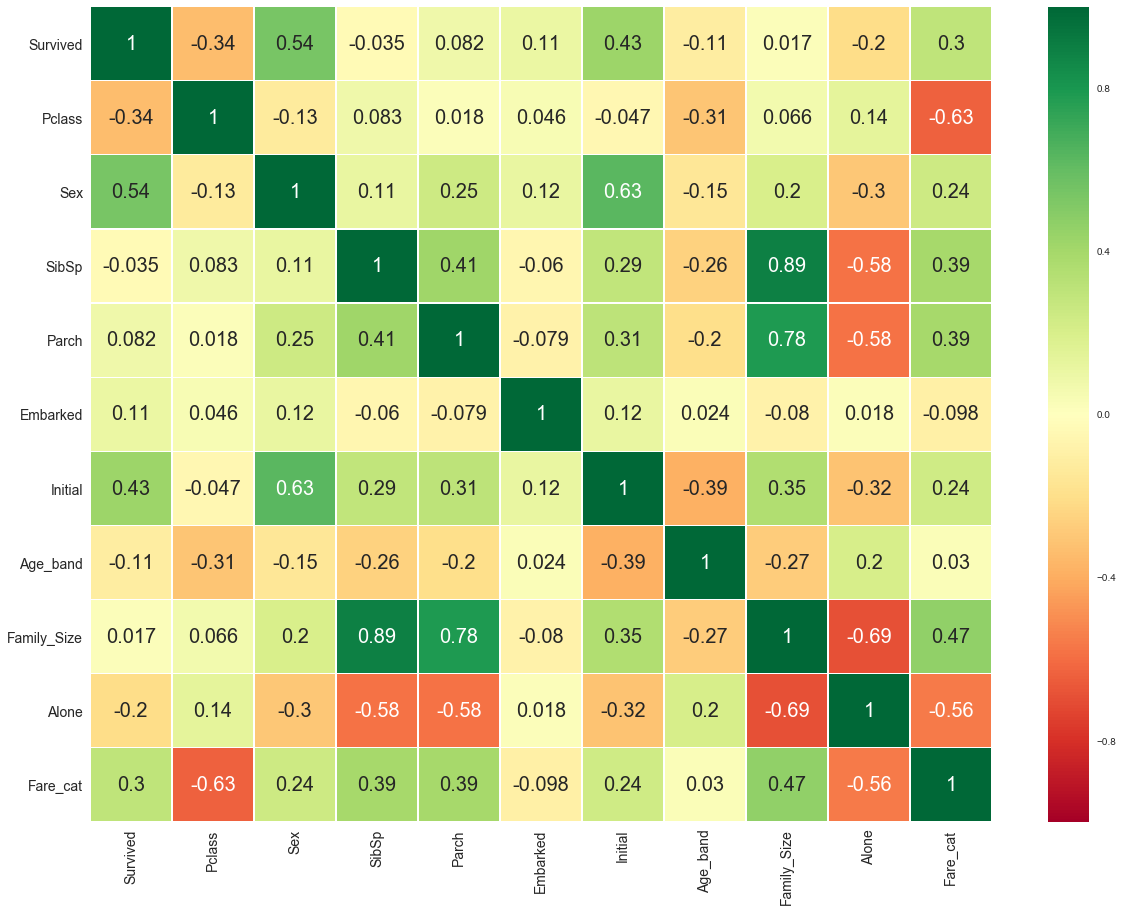

In [54]:
# Age_bandとFare_catがintでcorrに現れなかったため型を変更
data = data.astype({'Age_band': float, 'Fare_cat': float})
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
plt.gcf().set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [56]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_x = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_x = test[test.columns[1:]]
test_y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data.Survived

In [57]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,0,3,0,0,0,0,0,1.0,0,1,0.0
836,0,3,0,0,0,0,0,1.0,0,1,1.0
639,0,3,0,1,0,0,0,2.0,1,0,2.0
389,1,2,1,0,0,1,2,1.0,0,1,1.0
597,0,3,0,0,0,0,0,3.0,0,1,0.0


In [58]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_x, train_y)
prediction1 = model.predict(test_x)
print('Accuracy for rbf-SVM is ', metrics.accuracy_score(prediction1, test_y))

Accuracy for rbf-SVM is  0.835820895522


In [59]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_x, train_y)
prediction2 = model.predict(test_x)
print('Accuracy for linear-SVM is ', metrics.accuracy_score(prediction2, test_y))

Accuracy for linear-SVM is  0.817164179104


In [60]:
model = LogisticRegression()
model.fit(train_x, train_y)
prediction3 = model.predict(test_x)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_y))

The accuracy of the Logistic Regression is  0.817164179104


In [61]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
prediction4 = model.predict(test_x)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_y))

The accuracy of the Decision Tree is  0.80223880597


In [62]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
prediction5 = model.predict(test_x)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5, test_y))

The accuracy of the KNN is 0.824626865672


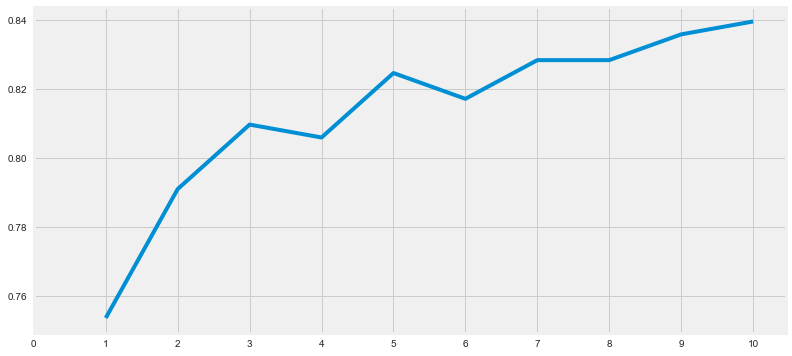

In [63]:
a_index = list(range(1, 11))
a = pd.Series()
x = list(range(11))
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.gcf().set_size_inches(12, 6)
plt.show()

In [64]:
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

Accuracies for different values of n are: [ 0.75373134  0.79104478  0.80970149  0.80597015  0.82462687  0.81716418
  0.82835821  0.82835821  0.8358209   0.83955224] with the max value as  0.839552238806


In [65]:
model = GaussianNB()
model.fit(train_x, train_y)
prediction6 = model.predict(test_x)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_y))

The accuracy of the NaiveBayes is 0.809701492537


In [66]:
model = RandomForestClassifier()
model.fit(train_x, train_y)
prediction7 = model.predict(test_x)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_y))

The accuracy of the Random Forests is 0.80223880597


In [67]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100),
]

In [68]:
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_model_dataframe = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_model_dataframe

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.804719,0.021377
KNN,0.814931,0.049881
Decision Tree,0.808115,0.031712
Naive Bayes,0.801386,0.028999
Random Forest,0.812609,0.033835


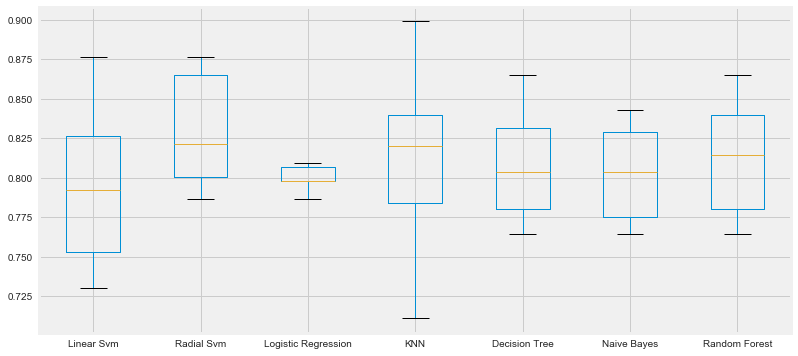

In [70]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()
plt.show()

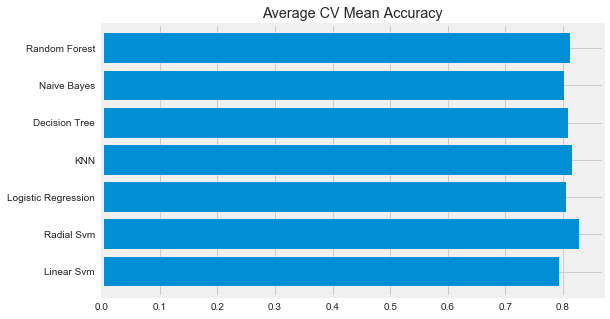

In [71]:
new_model_dataframe['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
plt.gcf().set_size_inches(8, 5)
plt.show()

In [72]:
classifiers = [
    'Linear Svm',
    'Radial Svm',
    'Logistic Regression',
    'KNN',
    'Decision Tree',
    'Naive Bayes',
    'Random Forest'
]
models = [
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100),
]

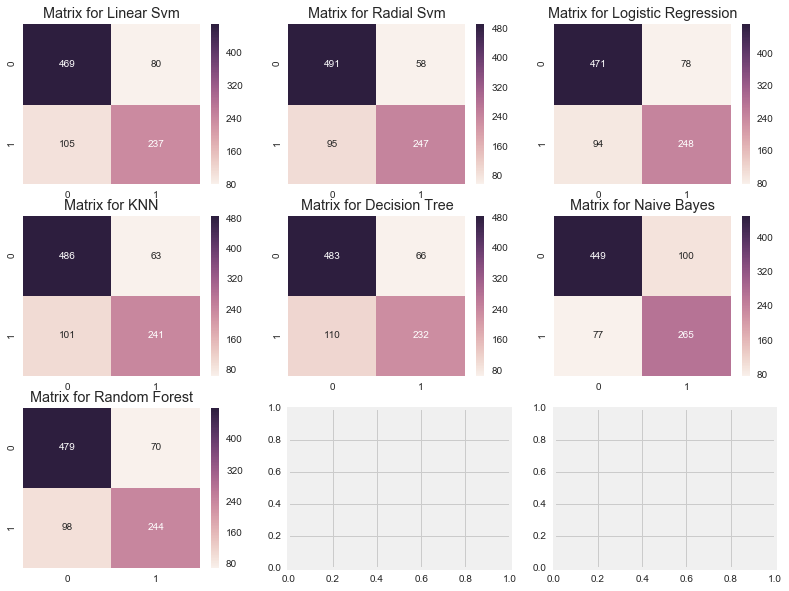

In [74]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
for i, name in enumerate(classifiers):
    model = models[i]
    y_pred = cross_val_predict(model, X, Y, cv=10)
    axis = ax[i // 3, i % 3]
    sns.heatmap(confusion_matrix(Y, y_pred), ax=axis, annot=True, fmt='2.0f')
    axis.set_title('Matrix for ' + name)
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [79]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = np.linspace(0.1, 1.0, 10)
kernel = ['rbf', 'linear']
hyper = {
    'kernel': kernel,
    'C': C,
    'gamma': gamma,
}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   16.4s finished


In [80]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators': n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   27.4s finished


0.81593714927
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [81]:
from sklearn.ensemble import VotingClassifier
ensemble_all = VotingClassifier(estimators=[
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
    ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
    ('LR', LogisticRegression(C=0.05)),
    ('DT', DecisionTreeClassifier(random_state=0)),
    ('NB', GaussianNB()),
    ('svm', svm.SVC(kernel='linear', probability=True))
], voting='soft').fit(train_x, train_y)
print('The accuracy for ensembled model is:', ensemble_all.score(test_x, test_y))
cross = cross_val_score(ensemble_all, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.817164179104
The cross validated score is 0.822654919986


In [82]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.835820895522
The cross validated score for bagged KNN is: 0.816012938372


In [83]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.817164179104
The cross validated score for bagged Decision Tree is: 0.818273181251


In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.824952616048


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.813804051753


In [86]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.814927930995


In [87]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.5min finished


0.83164983165
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


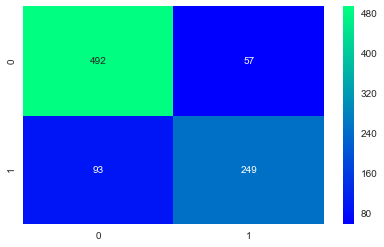

In [88]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

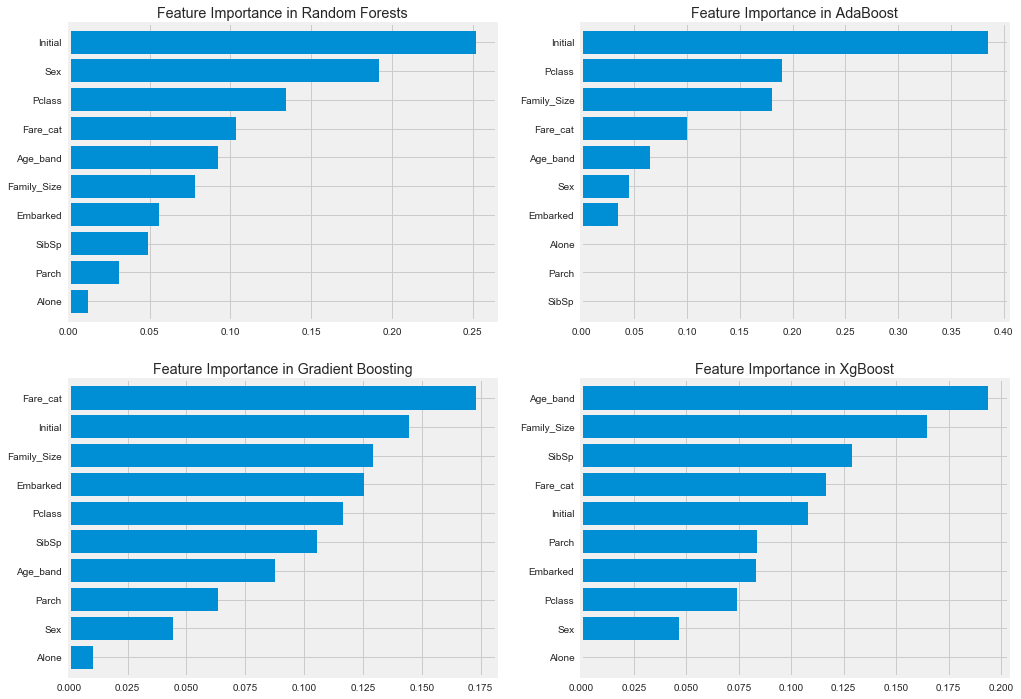

In [89]:
f, ax = plt.subplots(2, 2, figsize=(15, 12))
models = [
    ('Random Forests', RandomForestClassifier(n_estimators=500, random_state=0)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)),
    ('XgBoost', xg.XGBClassifier(n_estimators=900, learning_rate=0.1))
]

for i, (name, model) in enumerate(models):
    model.fit(X, Y)
    axis = ax[i // 2, i % 2]
    pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=axis)
    axis.set_title('Feature Importance in ' + name)
plt.show()

In [ ]:
"""
TODO
- カテゴリデータのダミー変数化
- 寄与度の低い特徴量の削除
"""